### Parse Data

In [1]:
import gzip
import pandas as pd

def parse_data(path):
    #read data from zip file
    data=[]
    fl = gzip.open(path, 'r')
    for ln in fl:
        data.append(eval(ln))
    dct = {}
    i = 0
    for d in data:
        dct[i] = d
        i += 1
    df= pd.DataFrame.from_dict(dct, orient='index')
    df['reviewTime'] = pd.to_datetime(df['reviewTime'])
    return df

### Text Processing    

In [2]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

def text_processing(text):
    stop_words = set(stopwords.words('english'))
    #word_tokens = word_tokenize(text)
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    return [w for w in word_tokens if not w in stop_words]

In [3]:
from datetime import datetime
def df_time_period(df, start_date, end_date):
    try:
        if(datetime.strptime(start_date, '%Y-%m-%d')>datetime.strptime(end_date, '%Y-%m-%d')):
            raise ValueError()
        return df.loc[(df['reviewTime']>start_date) & (df['reviewTime']<end_date)]
    except:
        print("start date cannot be later than end date")
        return

### Task 1

In [4]:
import collections
def Task1():
    datasets=['datasets\\reviews_Baby_5.json.gz','datasets\\reviews_Beauty_5.json.gz','datasets\\reviews_Grocery_and_Gourmet_Food_5.json.gz']
    start_dt='2005-01-01'
    end_dt='2009-01-01'
    for ds in datasets:
        df=parse_data(ds)
        df_sub=df_time_period(df,start_dt,end_dt)
        review_text = df_sub['reviewText'].str.cat(sep=',').lower()
        words=text_processing(review_text)
        print('Top 20 words with count for dataset',ds,'between',start_dt,'and',end_dt)
        print(collections.Counter(list(words)).most_common(20))

### Task 2

In [5]:
def get_log():
    dataset='datasets\\reviews_Beauty_5.json.gz'
    df=parse_data(dataset)
    df_review_text=df[['reviewText']]
    T=[]
    M=set()
    cols = ['ReviewSeqNo','T', 'M']
    log=[]
    for idx, review in df_review_text.iterrows():
        words=text_processing(review['reviewText'])
        T.extend(words)
        M.update(words)
        log.append([idx+1,len(T),len(M)])
    df_log=pd.DataFrame(log,columns=cols)
    return df_log

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_log10M_log10T(data):
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(data['ReviewSeqNo'] ,np.log10(data['T']), label = 'log10T') 
    ax.plot(data['ReviewSeqNo'],np.log10(data['M']), label = 'log10M')
    plt.title('log10M vs log10T')
    ax.legend(loc='lower right', shadow=True, ncol=2)
    plt.savefig('output\log10M_vs_log10T.png')

In [7]:
def Task2():
    print('Generating log')
    log=get_log()
    print('Exporting seq_T_M_log.csv')
    log.to_csv('output\\seq_T_M_log.csv', index=False, encoding='utf-8')
    print('Plotting log10M vs log10T')
    plot_log10M_log10T(log)

In [8]:
def main():
    print('Executing Task 1')
    Task1()
    print('End of Task 1')
    print('Executing Task 2')
    Task2()
    print('End of Task 2')

Executing Task 1
Top 20 words with count for dataset datasets\reviews_Baby_5.json.gz between 2005-01-01 and 2009-01-01
[('baby', 4423), ('one', 3422), ('use', 2826), ('would', 2350), ('like', 2252), ('get', 2234), ('great', 2209), ('also', 1942), ('time', 1870), ('son', 1821), ('really', 1713), ('little', 1660), ('bottles', 1657), ('old', 1645), ('seat', 1644), ('months', 1560), ('much', 1555), ('daughter', 1463), ('put', 1460), ('well', 1459)]
Top 20 words with count for dataset datasets\reviews_Beauty_5.json.gz between 2005-01-01 and 2009-01-01
[('hair', 3159), ('skin', 3010), ('product', 2699), ('use', 2312), ('like', 2110), ('one', 1498), ('would', 1233), ('really', 1170), ('good', 1157), ('using', 1150), ('well', 1110), ('used', 1099), ('also', 1061), ('get', 1056), ('face', 1035), ('dry', 998), ('great', 983), ('time', 892), ('little', 867), ('products', 853)]
Top 20 words with count for dataset datasets\reviews_Grocery_and_Gourmet_Food_5.json.gz between 2005-01-01 and 2009-01-01

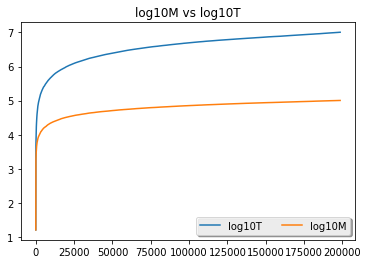

In [9]:
if __name__ == "__main__":
    main()